In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

from PIL import Image

In [2]:
df = pd.read_csv(r"data/pokemon.csv")
df = df.drop_duplicates(subset=["#"])
df = df.set_index("#")
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


In [3]:
images_train = list()
images_test = list()

for k in range(1, 494):
    try:
        images_train.append(np.array(Image.open(fr"sprites\{k}.png").convert('RGB')))
        images_test.append(np.array(Image.open(fr"sprites\frame2\{k}.png").convert('RGB')))
    except (IOError, OSError):
        pass

images_train = np.array(images_train)
images_test = np.array(images_test)

targets_train = np.array(df.iloc[:493, 1])
targets_test = np.array(df.iloc[:493, 1])

Dico = {'Ice': 0,
        'Ghost': 1,
        'Fire': 2,
        'Poison': 3,
        'Rock': 4,
        'Ground': 5,
        'Normal': 6,
        'Bug': 7,
        'Dark': 8,
        'Grass': 9,
        'Fairy': 10,
        'Water': 11,
        'Psychic': 12,
        'Electric': 13,
        'Fighting': 14,
        'Dragon': 15,
        'Steel': 16}

targets_train = np.vectorize(Dico.get)(targets_train)
targets_test = np.vectorize(Dico.get)(targets_test)

print(images_train.shape)
print(images_test.shape)

print(targets_train.shape)
print(targets_test.shape)

(493, 80, 80, 3)
(493, 80, 80, 3)
(493,)
(493,)


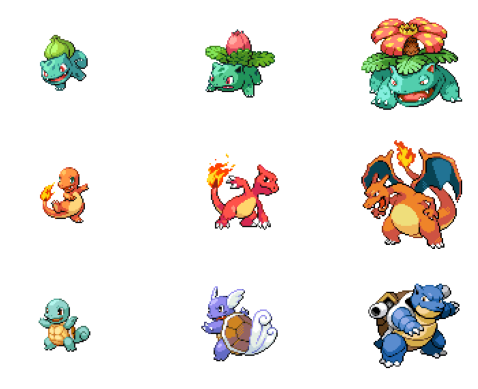

In [4]:
for k in range(9):
    ax = plt.subplot(3, 3, k + 1)
    plt.imshow(images_train[k])
    plt.axis("off")

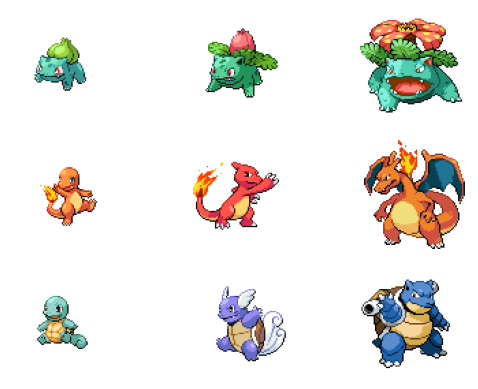

In [5]:
for k in range(9):
    ax = plt.subplot(3, 3, k + 1)
    plt.imshow(images_test[k])
    plt.axis("off")

In [6]:
images_train = images_train.astype(float)
images_test = images_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1.

images_train = images_train / 255
images_test = images_test / 255

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(80, 80, 3), include_top=False, weights="imagenet")
base_model.trainable = False

In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 3, 3, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 17)                21777     
                                                                 
Total params: 2,279,761
Trainable params: 21,777
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [11]:
history = model.fit(images_train, targets_train, batch_size=12, epochs=20,
                    validation_data=(images_test, targets_test))

Epoch 1/20
42/42 [==============================] - 8s 113ms/step - loss: 3.8098 - accuracy: 0.1075 - val_loss: 2.7643 - val_accuracy: 0.1927
Epoch 2/20
42/42 [==============================] - 4s 92ms/step - loss: 2.9554 - accuracy: 0.1846 - val_loss: 2.4346 - val_accuracy: 0.2759
Epoch 3/20
42/42 [==============================] - 4s 94ms/step - loss: 2.6282 - accuracy: 0.2312 - val_loss: 2.3448 - val_accuracy: 0.2799
Epoch 4/20
42/42 [==============================] - 4s 94ms/step - loss: 2.3754 - accuracy: 0.3306 - val_loss: 2.1666 - val_accuracy: 0.3367
Epoch 5/20
42/42 [==============================] - 4s 90ms/step - loss: 2.0972 - accuracy: 0.3469 - val_loss: 2.0034 - val_accuracy: 0.3955
Epoch 6/20
42/42 [==============================] - 4s 92ms/step - loss: 1.8275 - accuracy: 0.4320 - val_loss: 1.8430 - val_accuracy: 0.4260
Epoch 7/20
42/42 [==============================] - 4s 92ms/step - loss: 1.7672 - accuracy: 0.4564 - val_loss: 1.9644 - val_accuracy: 0.3895
Epoch 8/20
4


KeyboardInterrupt



In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.grid(True)
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
images_predict = list()

for k in range(1, 494):
    try:
        images_predict.append(np.array(Image.open(fr"sprites\frame2\{k}.png").convert('RGB')))
    except (IOError, OSError):
        pass

images_predict = np.array(images_predict)
images_predict = images_predict.astype(float)
images_predict = images_predict / 255

print(images_predict.shape)

check = model.predict(images_predict)
df_ckeck = pd.DataFrame(check)

Dico_inverted = {v: k for k, v in Dico.items()}

df_ckeck.rename(columns=Dico_inverted, inplace=True)

In [ ]:
df_ckeck.index = df_ckeck.index + 1
df_ckeck["Name"] = df["Name"]

df_ckeck = df_ckeck.round(5)

df_ckeck["Precision"] = df_ckeck.iloc[:, :-1].max(axis=1)
df_ckeck["Predited Type"] = df_ckeck.iloc[:, :-2].idxmax(axis=1)
df_ckeck["True Type"] = df["Type 1"]
df_ckeck["Passed"] = df_ckeck["Predited Type"] == df_ckeck["True Type"]

cols = df_ckeck.columns.tolist()
cols = cols[-5:] + cols[:-5]

df_ckeck = df_ckeck[cols]

df_ckeck

In [ ]:
percentage = len(df_ckeck.loc[df_ckeck["Passed"] == True]) / df_ckeck.shape[0]
print(f"Pourcentage de prédictions correctes : {percentage}")

In [ ]:
df_ckeck.to_csv("out/pokemonPredictionV2.csv")